In [1]:
%pip install pyspark matplotlib

Note: you may need to restart the kernel to use updated packages.


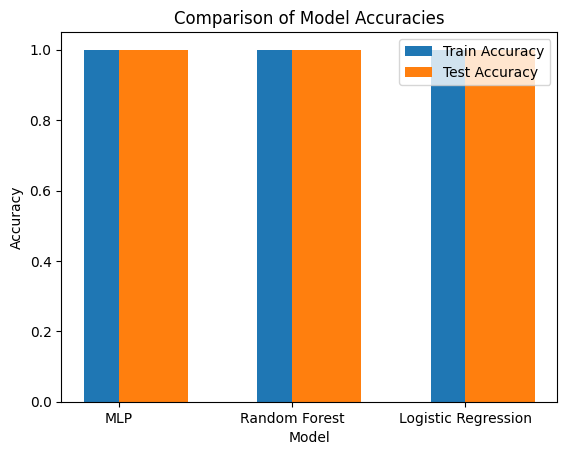

In [ ]:
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, LogisticRegression
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# import matplotlib.pyplot as plt

# class DataLoader:
#     def __init__(self, file_path):
#         self.spark = SparkSession.builder.appName("MNISTClassifier").getOrCreate()
#         self.data = self.spark.read.csv(file_path, header=True, inferSchema=True)

#     def preprocess(self):
#         feature_columns = self.data.columns[:-1]
#         label_column = self.data.columns[-1]  # Giả sử cột nhãn là cột cuối cùng
#         assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
#         self.data = assembler.transform(self.data).withColumnRenamed(label_column, "label").select("features", "label")
#         self.train_data, self.test_data = self.data.randomSplit([0.8, 0.2], seed=1234)
#         return self.train_data, self.test_data

# class Classifier:
#     def __init__(self, model):
#         self.model = model
#         self.evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

#     def train(self, train_data):
#         self.model = self.model.fit(train_data)

#     def evaluate(self, data):
#         predictions = self.model.transform(data)
#         accuracy = self.evaluator.evaluate(predictions)
#         return accuracy

# class MultiLayerPerceptron(Classifier):
#     def __init__(self):
#         layers = [784, 128, 64, 10]  # Cấu trúc mạng MLP
#         mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234)
#         super().__init__(mlp)

# class RandomForest(Classifier):
#     def __init__(self):
#         rf = RandomForestClassifier(numTrees=100, seed=1234)
#         super().__init__(rf)

# class LogisticRegressionModel(Classifier):
#     def __init__(self):
#         lr = LogisticRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8)
#         super().__init__(lr)

# def plot_accuracies(train_accuracies, test_accuracies, labels):
#     x = range(len(labels))
#     fig, ax = plt.subplots()
#     ax.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
#     ax.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
#     ax.set_xlabel('Model')
#     ax.set_ylabel('Accuracy')
#     ax.set_title('Comparison of Model Accuracies')
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels)
#     ax.legend()
#     plt.show()

# if __name__ == "__main__":
#     data_loader = DataLoader("/content/drive/MyDrive/Colab_Notebooks/mnist_mini.csv")
#     train_data, test_data = data_loader.preprocess()

#     classifiers = [MultiLayerPerceptron(), RandomForest(), LogisticRegressionModel()]
#     labels = ["MLP", "Random Forest", "Logistic Regression"]

#     train_accuracies = []
#     test_accuracies = []

#     for classifier in classifiers:
#         classifier.train(train_data)
#         train_accuracy = classifier.evaluate(train_data)
#         test_accuracy = classifier.evaluate(test_data)
#         train_accuracies.append(train_accuracy)
#         test_accuracies.append(test_accuracy)

#     plot_accuracies(train_accuracies, test_accuracies, labels)


In [1]:
# class SparkClassifier:
#   def __init__(self, model, label_col="label", features_col = "features"):
#     self.model = model
#     self.label_col = label_col
#     self.features_col = features_col

#   def train(self, train_data):
#     if isinstance(self.model, LinearSVC):
#       ovr = OneVsRest(classifier=self.model, labelCol=self.label_col,
#                       featuresCol=self.features_col)
#       return ovr.fit(train_data)
#     else:
#       return self.model.fit(train_data)

#   def evaluate(self, model, test_data):
#     predictions = model.transform(test_data)
#     evaluator = MulticlassClassificationEvaluator(labelCol=self.label_col,
#                                                   predictionCol="prediction", metricName="accuracy")
#     accuracy = evaluator.evaluate(predictions)
#     return accuracy

In [4]:
# class SparkMLPClassifier(SparkClassifier):
#   def __init__(self, layers):
#     model=MultilayerPerceptronClassifier(layers=layers)
#     super().__init__(model)
# class SparkRandomForestClassifier(SparkClassifier):
#   def __init__(self):
#     model = RandomForestClassifier()
#     super().__init__(model)

# class SparkLinearSVMClassifier(SparkClassifier):
#   def __init__(self):
#     model = LinearSVC(labelCol="label", maxIter=50)
#     super().__init(model)

In [5]:
# class SparkClassificationWorkFlow:
#   def __init__(self):
#     self.model_names = ["MLP", "Random Forest", "Linear SVM"]
#     self.train_accuracies = {"original": [], "svd": []}
#     self.test_accuracies = {"original": [], "svd": []}

In [9]:
# from pyspark.sql import SQLContext
# from pyspark.ml.linalg import Vectors
# from pyspark.sql import functions as f

# def load_data(self, input_path):
#     data = sqlc.read.csv(input_path, sep=',', inferSchema=True, header=False)
#     data = data.rdd.map(lambda x: (x[0], Vectors.dense([float(it) for it in x[1:]]))) \
#                   .toDF() \
#                   .select(f.col('_1').alias('label'), f.col('_2').alias('features'))
#     return data

# def train_and_evaluate(self, classifier, train_data, test_data):
#     model = classifier.train(train_data)
#     train_accuracy = classifier.evaluate(model, train_data)
#     test_accuracy = classifier.evaluate(model, test_data)
#     return train_accuracy, test_accuracy

In [10]:
# def run_workflow(self, train_data, test_data, train_data_svd, test_data_svd):
#   classifiers = [SparkMLPClassifier(layers=None),
#                  SparkRandomForestClassifier(), SparkLinearSVMClassifier()]
#   for classifier in classifiers:
#     for data_type, (train, test) in zip(["original", "svd"],
#                                         [(train_data, test_data), (train_data_svd, test_data_svd)]):
#       # For MLP classifier, update the layers based on the number of features
#       if isinstance(classifier, SparkMLPClassifier):
#         num_input_features = len(train.select("features").first()[0])
#         layers = [num_input_features, 128, (train.agg({"label": "max"}).first()[0] + 1)]
#         classifier.model.setLayers(layers)
#       else:
#         layers = None # For non-MLP classifiers, layers can be None
#       if layers is not None:
#         classifier_instance = type(classifier)(layers=layers)
#       else:
#         classifier_instance = type(classifier)()

#       train_acc, test_acc = self.train_and_evaluate(classifier_instance, train, test)
#       self.train_accuracies[data_type].append(train_acc)
#       self.test_accuracies[data_type].append(test_acc)
#   self.display_accuracies()
#   self.plot_quad_bar_chart()

In [11]:
# import numpy as np
# def display_accuracies(self):
#   for data_type in ["original", "svd"]:
#     for i in range(len(self.model_names)):
#       print(f"""{data_type.capitalize()} {self.model_names[i]}
#             Train Accuracy: {self.train_accuracies[data_type][i]}""")
#       print(f"""{data_type.capitalize()} {self.model_names[i]}
#             Test Accuracy: {self.test_accuracies[data_type][i]}""")
#       print()

# def plot_quad_bar_chart(self):
#   bar_width = 0.2
#   bar_train_original = np.arange(len(self.model_names))
#   bar_train_svd = bar_train_original + bar_width
#   bar_test_original = bar_train_svd + bar_width
#   bar_test_svd = bar_test_original + bar_width

#   plt.bar(bar_train_original, self.train_accuracies["original"], width=bar_width, label='Train (Original)')
#   plt.bar(bar_train_svd, self.train_accuracies["svd"], width=bar_width, label='Train (SVD)')
#   plt.bar(bar_test_original, self.test_accuracies["original"], width=bar_width, label='Test (Original)')
#   plt.bar(bar_test_svd, self.test_accuracies["svd"], width=bar_width, label='Test (SVD)')

#   plt.xlabel('Models')
#   plt.ylabel('Accuracy')
#   plt.title('Model Accuracies in Training and Test Sets')
#   plt.xticks(bar_train_original + bar_width, self.model_names)
#   plt.legend()

#   plt.show()

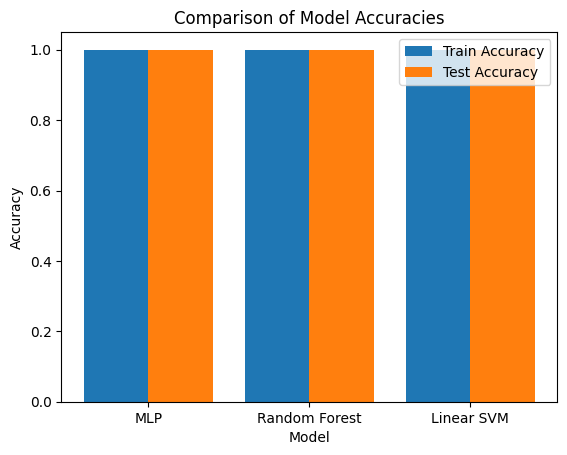

In [13]:
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, LinearSVC, OneVsRest
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# import matplotlib.pyplot as plt
# import numpy as np

# # Data Loader Class
# class DataLoader:
#     def __init__(self, file_path):
#         self.spark = SparkSession.builder.appName("MNISTClassifier").getOrCreate()
#         self.data = self.spark.read.csv(file_path, header=True, inferSchema=True)

#     def preprocess(self):
#         feature_columns = self.data.columns[:-1]
#         label_column = self.data.columns[-1]
#         assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
#         self.data = assembler.transform(self.data).withColumnRenamed(label_column, "label").select("features", "label")
#         self.train_data, self.test_data = self.data.randomSplit([0.8, 0.2], seed=1234)
#         return self.train_data, self.test_data

# # Base Classifier Class
# class Classifier:
#     def __init__(self, model):
#         self.model = model
#         self.evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

#     def train(self, train_data):
#         self.model = self.model.fit(train_data)

#     def evaluate(self, data):
#         predictions = self.model.transform(data)
#         accuracy = self.evaluator.evaluate(predictions)
#         return accuracy

# # Multi-layer Perceptron Classifier
# class MultiLayerPerceptron(Classifier):
#     def __init__(self):
#         layers = [784, 128, 64, 10]
#         mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234)
#         super().__init__(mlp)

# # Random Forest Classifier
# class RandomForest(Classifier):
#     def __init__(self):
#         rf = RandomForestClassifier(numTrees=100, seed=1234)
#         super().__init__(rf)

# # Linear SVM Classifier (handled via OneVsRest)
# class LinearSVM(Classifier):
#     def __init__(self):
#         lsvc = LinearSVC(maxIter=10, regParam=0.1)
#         ovr = OneVsRest(classifier=lsvc)
#         super().__init__(ovr)

# # Workflow to train, evaluate, and plot results
# class SparkClassificationWorkflow:
#     def __init__(self):
#         self.model_names = ["MLP", "Random Forest", "Linear SVM"]
#         self.train_accuracies = []
#         self.test_accuracies = []

#     def load_data(self, input_path):
#         data_loader = DataLoader(input_path)
#         return data_loader.preprocess()

#     def train_and_evaluate(self, classifier, train_data, test_data):
#         classifier.train(train_data)
#         train_accuracy = classifier.evaluate(train_data)
#         test_accuracy = classifier.evaluate(test_data)
#         return train_accuracy, test_accuracy

#     def run_workflow(self, train_data, test_data):
#         classifiers = [MultiLayerPerceptron(), RandomForest(), LinearSVM()]
#         for classifier in classifiers:
#             train_acc, test_acc = self.train_and_evaluate(classifier, train_data, test_data)
#             self.train_accuracies.append(train_acc)
#             self.test_accuracies.append(test_acc)
#         self.plot_accuracies()

#     def plot_accuracies(self):
#         x = np.arange(len(self.model_names))
#         fig, ax = plt.subplots()
#         ax.bar(x - 0.2, self.train_accuracies, width=0.4, label='Train Accuracy')
#         ax.bar(x + 0.2, self.test_accuracies, width=0.4, label='Test Accuracy')
#         ax.set_xlabel('Model')
#         ax.set_ylabel('Accuracy')
#         ax.set_title('Comparison of Model Accuracies')
#         ax.set_xticks(x)
#         ax.set_xticklabels(self.model_names)
#         ax.legend()
#         plt.show()

# # Main Execution
# if __name__ == "__main__":
#     workflow = SparkClassificationWorkflow()
#     train_data, test_data = workflow.load_data("/content/drive/MyDrive/Colab_Notebooks/mnist_mini.csv")
#     workflow.run_workflow(train_data, test_data)


In [3]:
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, LinearSVC, OneVsRest
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# import matplotlib.pyplot as plt
# import numpy as np

# # Data Loader Class
# class DataLoader:
#     def __init__(self, file_path):
#         self.spark = SparkSession.builder.appName("MNISTClassifier").getOrCreate()
#         self.data = self.spark.read.csv(file_path, header=True, inferSchema=True)

#     def preprocess(self):
#         # Assuming the last column is the label
#         feature_columns = self.data.columns[:-1]
#         label_column = self.data.columns[-1]
#         assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
#         self.data = assembler.transform(self.data).withColumnRenamed(label_column, "label").select("features", "label")
#         self.train_data, self.test_data = self.data.randomSplit([0.8, 0.2], seed=1234)
#         return self.train_data, self.test_data

# # Base Classifier Class
# class Classifier:
#     def __init__(self, model):
#         self.model = model
#         self.evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

#     def train(self, train_data):
#         self.model = self.model.fit(train_data)

#     def evaluate(self, data):
#         predictions = self.model.transform(data)
#         accuracy = self.evaluator.evaluate(predictions)
#         return accuracy

# # Multi-layer Perceptron Classifier
# class MultiLayerPerceptron(Classifier):
#     def __init__(self):
#         layers = [784, 128, 64, 10]
#         mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234)
#         super().__init__(mlp)

# # Random Forest Classifier
# class RandomForest(Classifier):
#     def __init__(self):
#         rf = RandomForestClassifier(numTrees=100, seed=1234)
#         super().__init__(rf)

# # Linear SVM Classifier (handled via OneVsRest)
# class LinearSVM(Classifier):
#     def __init__(self):
#         lsvc = LinearSVC(maxIter=10, regParam=0.1)
#         ovr = OneVsRest(classifier=lsvc)
#         super().__init__(ovr)

# # Workflow to train, evaluate, and plot results
# class SparkClassificationWorkflow:
#     def __init__(self):
#         self.model_names = ["MLP", "Random Forest", "Linear SVM"]
#         self.train_accuracies = []
#         self.test_accuracies = []

#     def load_data(self, input_path):
#         data_loader = DataLoader(input_path)
#         return data_loader.preprocess()

#     def train_and_evaluate(self, classifier, train_data, test_data):
#         classifier.train(train_data)
#         train_accuracy = classifier.evaluate(train_data)
#         test_accuracy = classifier.evaluate(test_data)
#         return train_accuracy, test_accuracy

#     def run_workflow(self, train_data, test_data):
#         classifiers = [MultiLayerPerceptron(), RandomForest(), LinearSVM()]
#         for classifier in classifiers:
#             train_acc, test_acc = self.train_and_evaluate(classifier, train_data, test_data)
#             self.train_accuracies.append(train_acc)
#             self.test_accuracies.append(test_acc)
#         self.plot_accuracies()

#     def plot_accuracies(self):
#         x = np.arange(len(self.model_names))
#         fig, ax = plt.subplots()
#         ax.bar(x - 0.2, self.train_accuracies, width=0.4, label='Train Accuracy')
#         ax.bar(x + 0.2, self.test_accuracies, width=0.4, label='Test Accuracy')
#         ax.set_xlabel('Model')
#         ax.set_ylabel('Accuracy')
#         ax.set_title('Comparison of Model Accuracies')
#         ax.set_xticks(x)
#         ax.set_xticklabels(self.model_names)
#         ax.legend()
#         plt.show()

# # Main Execution
# if __name__ == "__main__":
#     workflow = SparkClassificationWorkflow()
#     train_data, test_data = workflow.load_data("mnist_mini.csv")
#     workflow.run_workflow(train_data, test_data)


Py4JJavaError: An error occurred while calling o75.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 4 in stage 61.0 failed 1 times, most recent failure: Lost task 4.0 in stage 61.0 (TID 283) (192.168.1.5 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 49 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$collectAsMap$1(PairRDDFunctions.scala:738)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:737)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions$lzycompute(MulticlassMetrics.scala:61)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions(MulticlassMetrics.scala:52)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass$lzycompute(MulticlassMetrics.scala:78)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass(MulticlassMetrics.scala:76)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.accuracy$lzycompute(MulticlassMetrics.scala:188)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.accuracy(MulticlassMetrics.scala:188)
	at org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator.evaluate(MulticlassClassificationEvaluator.scala:153)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:103)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 49 more


In [5]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import numpy as np

# Data Loader Class
class DataLoader:
    def __init__(self, file_path):
        conf = SparkConf() \
            .setAppName("MNISTClassifier") \
            .set("spark.python.worker.reuse", "true") \
            .set("spark.worker.timeout", "600") \
            .set("spark.network.timeout", "600s") \
            .set("spark.executor.heartbeatInterval", "60s") \
            .set("spark.executor.memory", "2g") \
            .set("spark.executor.cores", "2") \
            .set("spark.driver.memory", "2g")

        self.spark = SparkSession.builder.config(conf=conf).getOrCreate()
        self.data = self.spark.read.csv(file_path, header=True, inferSchema=True)

    def preprocess(self):
        feature_columns = self.data.columns[:-1]
        label_column = self.data.columns[-1]
        assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
        self.data = assembler.transform(self.data).withColumnRenamed(label_column, "label").select("features", "label")
        self.train_data, self.test_data = self.data.randomSplit([0.8, 0.2], seed=1234)
        return self.train_data, self.test_data

# Base Classifier Class
class Classifier:
    def __init__(self, model):
        self.model = model
        self.evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

    def train(self, train_data):
        self.model = self.model.fit(train_data)

    def evaluate(self, data):
        predictions = self.model.transform(data)
        accuracy = self.evaluator.evaluate(predictions)
        return accuracy

# Multi-layer Perceptron Classifier
class MultiLayerPerceptron(Classifier):
    def __init__(self):
        layers = [784, 128, 64, 10]
        mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234)
        super().__init__(mlp)

# Random Forest Classifier
class RandomForest(Classifier):
    def __init__(self):
        rf = RandomForestClassifier(numTrees=100, seed=1234)
        super().__init__(rf)

# Linear SVM Classifier (handled via OneVsRest)
class LinearSVM(Classifier):
    def __init__(self):
        lsvc = LinearSVC(maxIter=10, regParam=0.1)
        ovr = OneVsRest(classifier=lsvc)
        super().__init__(ovr)

# Workflow to train, evaluate, and plot results
class SparkClassificationWorkflow:
    def __init__(self):
        self.model_names = ["MLP", "Random Forest", "Linear SVM"]
        self.train_accuracies = []
        self.test_accuracies = []

    def load_data(self, input_path):
        data_loader = DataLoader(input_path)
        return data_loader.preprocess()

    def train_and_evaluate(self, classifier, train_data, test_data):
        classifier.train(train_data)
        train_accuracy = classifier.evaluate(train_data)
        test_accuracy = classifier.evaluate(test_data)
        return train_accuracy, test_accuracy

    def run_workflow(self, train_data, test_data):
        classifiers = [MultiLayerPerceptron(), RandomForest(), LinearSVM()]
        for classifier in classifiers:
            train_acc, test_acc = self.train_and_evaluate(classifier, train_data, test_data)
            self.train_accuracies.append(train_acc)
            self.test_accuracies.append(test_acc)
        self.plot_accuracies()

    def plot_accuracies(self):
        x = np.arange(len(self.model_names))
        fig, ax = plt.subplots()
        ax.bar(x - 0.2, self.train_accuracies, width=0.4, label='Train Accuracy')
        ax.bar(x + 0.2, self.test_accuracies, width=0.4, label='Test Accuracy')
        ax.set_xlabel('Model')
        ax.set_ylabel('Accuracy')
        ax.set_title('Comparison of Model Accuracies')
        ax.set_xticks(x)
        ax.set_xticklabels(self.model_names)
        ax.legend()
        plt.show()

# Main Execution
if __name__ == "__main__":
    workflow = SparkClassificationWorkflow()
    train_data, test_data = workflow.load_data("mnist_mini.csv")
    workflow.run_workflow(train_data, test_data)


Py4JJavaError: An error occurred while calling o833.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 124.0 failed 1 times, most recent failure: Lost task 2.0 in stage 124.0 (TID 565) (192.168.1.5 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 49 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$collectAsMap$1(PairRDDFunctions.scala:738)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:737)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions$lzycompute(MulticlassMetrics.scala:61)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions(MulticlassMetrics.scala:52)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass$lzycompute(MulticlassMetrics.scala:78)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass(MulticlassMetrics.scala:76)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.accuracy$lzycompute(MulticlassMetrics.scala:188)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.accuracy(MulticlassMetrics.scala:188)
	at org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator.evaluate(MulticlassClassificationEvaluator.scala:153)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:103)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 49 more
